<a href="https://colab.research.google.com/github/zaegeon/Python/blob/main/ML/20220621_ML09_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Imports

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import plot_roc_curve, plot_precision_recall_curve
from sklearn.metrics import PrecisionRecallDisplay, RocCurveDisplay

# 이진 분류(Binary Class Classification)

Breast cancer 데이터 셋에서 악성종양(malignant) / 양성종양(benign) 분류

## 데이터 준비

In [ ]:
cancer = datasets.load_breast_cancer()

In [ ]:
cancer.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

In [ ]:
print(cancer.DESCR)

.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variation in radius lengths)
        - compactness (perimeter^2 / area - 1.0)
        - concavity (severity of concave portions of the contour)
        - concave points (number of concave portions of the contour)
        - symmetry
        - fractal dimension ("coastline approximation" - 1)

        The mean, standard error, and "worst" or largest (mean of the three
        worst/largest values) of these features were computed for each image,
        resulting in 30 features.  For instance, field 0 is Mean Radi

In [ ]:
X = cancer.data.copy()  # cancer['data']
y = cancer.target.copy()  # cancer['target']

In [ ]:
X.shape, y.shape

((569, 30), (569,))

## 데이터 탐색

In [ ]:
cancer_df = pd.DataFrame(data=cancer.data, columns=cancer.feature_names)
cancer_df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [ ]:
cancer_df['target'] = cancer.target
cancer_df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


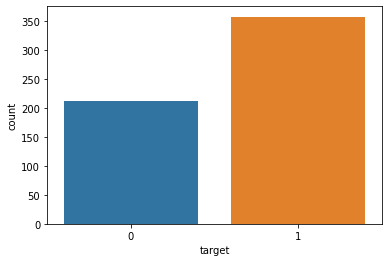

In [ ]:
sns.countplot(x='target', data=cancer_df)
plt.show()

In [ ]:
cancer_df['mean area'].describe()

count     569.000000
mean      654.889104
std       351.914129
min       143.500000
25%       420.300000
50%       551.100000
75%       782.700000
max      2501.000000
Name: mean area, dtype: float64

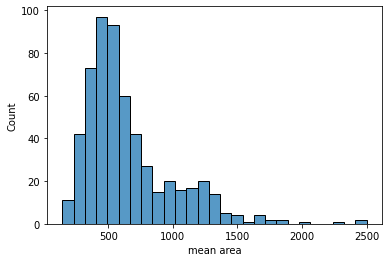

In [ ]:
sns.histplot(data=cancer_df, x='mean area')
plt.show()

In [ ]:
cancer_df['mean radius'].describe()

count    569.000000
mean      14.127292
std        3.524049
min        6.981000
25%       11.700000
50%       13.370000
75%       15.780000
max       28.110000
Name: mean radius, dtype: float64

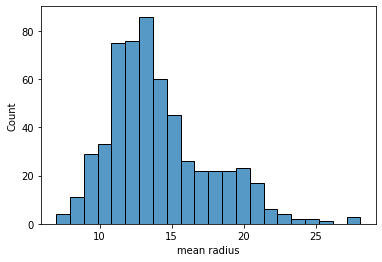

In [ ]:
sns.histplot(data=cancer_df, x='mean radius')
plt.show()

## 훈련 셋, 테스트 셋 분리

In [ ]:
X_tr, X_te, y_tr, y_te = train_test_split(X, y,
                                          test_size=.20,
                                          random_state=42,
                                          stratify=y)

In [ ]:
X_tr.shape, y_tr.shape

((455, 30), (455,))

In [ ]:
np.unique(y_tr, return_counts=True)

(array([0, 1]), array([170, 285]))

In [ ]:
np.unique(y_te, return_counts=True)

(array([0, 1]), array([42, 72]))

## KNN Classifier

In [ ]:
knn_model = Pipeline([('scaler', StandardScaler()),
                      ('clf', KNeighborsClassifier())])

In [ ]:
knn_model.fit(X_tr, y_tr) # 모델 훈련

Pipeline(steps=[('scaler', StandardScaler()), ('clf', KNeighborsClassifier())])

In [ ]:
# 훈련 셋 예측값
tr_pred = knn_model.predict(X_tr)

In [ ]:
confusion_matrix(y_tr, tr_pred)

array([[161,   9],
       [  3, 282]])

In [ ]:
print(classification_report(y_tr, tr_pred, target_names=cancer.target_names))

              precision    recall  f1-score   support

   malignant       0.98      0.95      0.96       170
      benign       0.97      0.99      0.98       285

    accuracy                           0.97       455
   macro avg       0.98      0.97      0.97       455
weighted avg       0.97      0.97      0.97       455



In [ ]:
161 / (161 + 3) # 0.98 (precision)

0.9817073170731707

In [ ]:
161 / (161 + 9) # 0.95 (recall)

0.9470588235294117

In [ ]:
# 테스트 셋 예측값
te_pred = knn_model.predict(X_te)

In [ ]:
confusion_matrix(y_te, te_pred)

array([[39,  3],
       [ 2, 70]])

In [ ]:
print(classification_report(y_te, te_pred, target_names=cancer.target_names))

              precision    recall  f1-score   support

   malignant       0.95      0.93      0.94        42
      benign       0.96      0.97      0.97        72

    accuracy                           0.96       114
   macro avg       0.96      0.95      0.95       114
weighted avg       0.96      0.96      0.96       114



In [ ]:
39 / (39 + 2) # 0.95 (precision)

0.9512195121951219

In [ ]:
39 / (39 + 3) # 0.93 (recall)

0.9285714285714286

## precision-recall curve

정밀도(precision)와 재현율(recall)은 trade-off 관계.

같은 정확도(accuracy)에서 정밀도가 높아지면 재현율은 낮아지고, 정밀도가 낮아지면 재현율이 높아짐.

precision-recall curve: 정밀도를 y축, 재현율을 x축으로 설정해서, 정밀도와 재현율의 trade-off 관계를 시각화한 그래프.

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_precision_recall_curve is deprecated; Function `plot_precision_recall_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: PrecisionRecallDisplay.from_predictions or PrecisionRecallDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


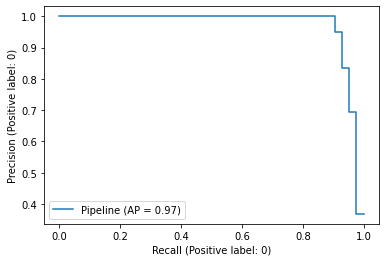

In [ ]:
plot_precision_recall_curve(estimator=knn_model, # 예측기 (ML 모델)
                            X=X_te,              # 데이터 (특성 2차원 배열)
                            y=y_te,              # 레이블 (타겟 1차원 배열)
                            pos_label=0)         # 양성(positive)으로 사용할 레이블
plt.show()

deprecate warning을 없애기 위해서 Scikit-Learn 1.0 버전에서 새로 생긴 메서드를 사용.

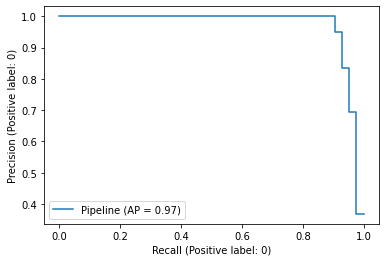

In [ ]:
PrecisionRecallDisplay.from_estimator(estimator=knn_model,
                                      X=X_te,
                                      y=y_te,
                                      pos_label=0)
plt.show()

### ROC(Receiver Operating Characteristic) Curve

* ROC curve : FPR(False Positive Rate, 가짜 양성 비율)를 x축에, TPR(True Positive Rate, 진짜 양성 비율)를 y축으로 설정해서, FPR과 TPR 사이의 trade-off 관계를 시각화.

* TPR = TP / (TP + FN) : 실제 양성 샘플들 중에서 정답의 비율. 재현율(recall)의 다른 용어.

* FPR = FP / (FP + TN) : 실제 음성 샘플들 중에서 오답(가짜 양성, 양성 예측)의 비율.

* TNR = TN / (FP + TN) : 실제 음성 샘플들 중에서 정답(진짜 음성) 비율. 특이도(Specificity)
    * TNR + FPR = 1
    * TNR = 1 - FPR

* AUC(Area Under Curve) : ROC Curve 아래쪽의 넓이
    * AUC가 1에 가까울수록 좋은 모델.

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


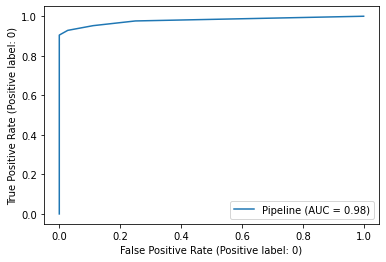

In [ ]:
plot_roc_curve(estimator=knn_model,
               X=X_te,
               y=y_te,
               pos_label=0)
plt.show()

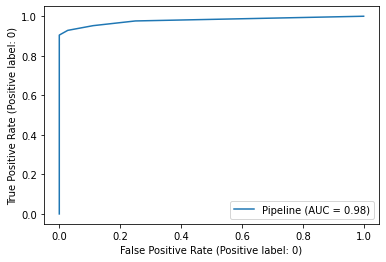

In [ ]:
RocCurveDisplay.from_estimator(estimator=knn_model,
               X=X_te,
               y=y_te,
               pos_label=0)
plt.show()

## Logistic Regression

In [ ]:
log_model = Pipeline([('scaler', StandardScaler()),
                      ('reg', LogisticRegression(random_state=42))])

In [ ]:
log_model.fit(X_tr, y_tr)

Pipeline(steps=[('scaler', StandardScaler()),
                ('reg', LogisticRegression(random_state=42))])

In [ ]:
# 훈련 셋 예측값, confusion matrix
tr_pred = log_model.predict(X_tr)
confusion_matrix(y_tr, tr_pred)

array([[166,   4],
       [  1, 284]])

In [ ]:
print(classification_report(y_tr, tr_pred, target_names=cancer.target_names))

              precision    recall  f1-score   support

   malignant       0.99      0.98      0.99       170
      benign       0.99      1.00      0.99       285

    accuracy                           0.99       455
   macro avg       0.99      0.99      0.99       455
weighted avg       0.99      0.99      0.99       455



In [ ]:
# 테스트 셋 예측값, confusion matrix
te_pred = log_model.predict(X_te)
confusion_matrix(y_te, te_pred)

array([[41,  1],
       [ 1, 71]])

In [ ]:
print(classification_report(y_te, te_pred, target_names=cancer.target_names))

              precision    recall  f1-score   support

   malignant       0.98      0.98      0.98        42
      benign       0.99      0.99      0.99        72

    accuracy                           0.98       114
   macro avg       0.98      0.98      0.98       114
weighted avg       0.98      0.98      0.98       114



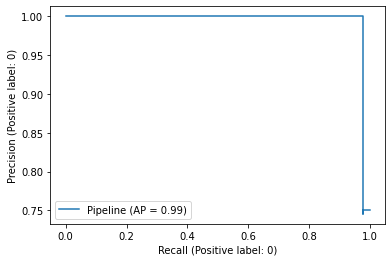

In [ ]:
PrecisionRecallDisplay.from_estimator(estimator=log_model,
                                      X=X_te,
                                      y=y_te,
                                      pos_label=0)
plt.show()

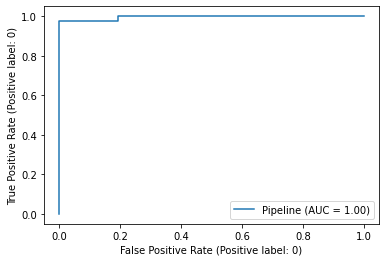

In [ ]:
RocCurveDisplay.from_estimator(estimator=log_model,
               X=X_te,
               y=y_te,
               pos_label=0)
plt.show()

## SGD Classifier

In [ ]:
sgd_model = Pipeline([('scaler', StandardScaler()),
                      ('reg', SGDClassifier(loss='log', random_state=42))])

In [ ]:
sgd_model.fit(X_tr, y_tr)

Pipeline(steps=[('scaler', StandardScaler()),
                ('reg', SGDClassifier(loss='log', random_state=42))])

In [ ]:
# 훈련 셋 예측값, confusion matrix
tr_pred = sgd_model.predict(X_tr)
confusion_matrix(y_tr, tr_pred)

array([[164,   6],
       [  6, 279]])

In [ ]:
print(classification_report(y_tr, tr_pred, target_names=cancer.target_names))

              precision    recall  f1-score   support

   malignant       0.96      0.96      0.96       170
      benign       0.98      0.98      0.98       285

    accuracy                           0.97       455
   macro avg       0.97      0.97      0.97       455
weighted avg       0.97      0.97      0.97       455



In [ ]:
# 테스트 셋 예측값, confusion matrix
te_pred = sgd_model.predict(X_te)
confusion_matrix(y_te, te_pred)

array([[41,  1],
       [ 2, 70]])

In [ ]:
print(classification_report(y_te, te_pred, target_names=cancer.target_names))

              precision    recall  f1-score   support

   malignant       0.95      0.98      0.96        42
      benign       0.99      0.97      0.98        72

    accuracy                           0.97       114
   macro avg       0.97      0.97      0.97       114
weighted avg       0.97      0.97      0.97       114



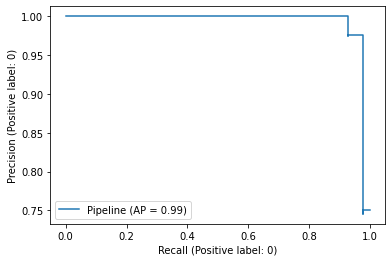

In [ ]:
PrecisionRecallDisplay.from_estimator(estimator=sgd_model,
                                      X=X_te, y=y_te,
                                      pos_label=0)
plt.show()

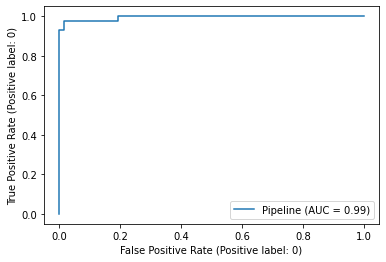

In [ ]:
RocCurveDisplay.from_estimator(estimator=sgd_model,
                               X=X_te, y=y_te, pos_label=0)
plt.show()

# 다중 클래스 분류(Multi-class Classification)

In [ ]:
iris = datasets.load_iris()

In [ ]:
X, y = iris.data.copy(), iris.target.copy()

In [ ]:
X.shape, y.shape

((150, 4), (150,))

In [ ]:
iris.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [ ]:
iris.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [ ]:
X_tr, X_te, y_tr, y_te = train_test_split(X, y,
                                          test_size=0.2,
                                          random_state=42,
                                          stratify=y)

## KNN Classifier

In [ ]:
knn_model = Pipeline([('scaler', StandardScaler()),
                      ('clf', KNeighborsClassifier())])

In [ ]:
knn_model.fit(X_tr, y_tr)

Pipeline(steps=[('scaler', StandardScaler()), ('clf', KNeighborsClassifier())])

In [ ]:
# 훈련 셋 예측값, confusion matrix
tr_pred = knn_model.predict(X_tr)
confusion_matrix(y_tr, tr_pred)

array([[40,  0,  0],
       [ 0, 39,  1],
       [ 0,  2, 38]])

In [ ]:
print(classification_report(y_tr, tr_pred, target_names=iris.target_names))

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        40
  versicolor       0.95      0.97      0.96        40
   virginica       0.97      0.95      0.96        40

    accuracy                           0.97       120
   macro avg       0.98      0.97      0.97       120
weighted avg       0.98      0.97      0.97       120



In [ ]:
# 테스트 셋 예측값, confusion matrix
te_pred = knn_model.predict(X_te)
confusion_matrix(y_te, te_pred)

array([[10,  0,  0],
       [ 0, 10,  0],
       [ 0,  2,  8]])

In [ ]:
print(classification_report(y_te, te_pred, target_names=iris.target_names))

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       0.83      1.00      0.91        10
   virginica       1.00      0.80      0.89        10

    accuracy                           0.93        30
   macro avg       0.94      0.93      0.93        30
weighted avg       0.94      0.93      0.93        30



## Logistic Regression

In [ ]:
log_model = Pipeline([('scaler', StandardScaler()),
                      ('clf', LogisticRegression(random_state=42))])

In [ ]:
log_model.fit(X_tr, y_tr)

Pipeline(steps=[('scaler', StandardScaler()),
                ('clf', LogisticRegression(random_state=42))])

In [ ]:
# 훈련 셋 예측값, confusion matrix
tr_pred = log_model.predict(X_tr)
confusion_matrix(y_tr, tr_pred)

array([[40,  0,  0],
       [ 0, 38,  2],
       [ 0,  3, 37]])

In [ ]:
print(classification_report(y_tr, tr_pred, target_names=iris.target_names))

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        40
  versicolor       0.93      0.95      0.94        40
   virginica       0.95      0.93      0.94        40

    accuracy                           0.96       120
   macro avg       0.96      0.96      0.96       120
weighted avg       0.96      0.96      0.96       120



In [ ]:
# 테스트 셋 예측값, confusion matrix
te_pred = log_model.predict(X_te)
confusion_matrix(y_te, te_pred)

array([[10,  0,  0],
       [ 0,  9,  1],
       [ 0,  1,  9]])

In [ ]:
print(classification_report(y_te, te_pred, target_names=iris.target_names))

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       0.90      0.90      0.90        10
   virginica       0.90      0.90      0.90        10

    accuracy                           0.93        30
   macro avg       0.93      0.93      0.93        30
weighted avg       0.93      0.93      0.93        30



## SGD Classifier

In [ ]:
sgd_model = Pipeline([('scaler', StandardScaler()),
                      ('clf', SGDClassifier(loss='log', random_state=42))])

In [ ]:
sgd_model.fit(X_tr, y_tr)

Pipeline(steps=[('scaler', StandardScaler()),
                ('clf', SGDClassifier(loss='log', random_state=42))])

In [ ]:
# 훈련 셋 예측값, confusion matrix
tr_pred = sgd_model.predict(X_tr)
confusion_matrix(y_tr, tr_pred)

array([[40,  0,  0],
       [ 0, 32,  8],
       [ 0,  0, 40]])

In [ ]:
print(classification_report(y_tr, tr_pred, target_names=iris.target_names))

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        40
  versicolor       1.00      0.80      0.89        40
   virginica       0.83      1.00      0.91        40

    accuracy                           0.93       120
   macro avg       0.94      0.93      0.93       120
weighted avg       0.94      0.93      0.93       120



In [ ]:
# 테스트 셋 예측값, confusion matrix
te_pred = sgd_model.predict(X_te)
confusion_matrix(y_te, te_pred)

array([[10,  0,  0],
       [ 0,  9,  1],
       [ 0,  0, 10]])

In [ ]:
print(classification_report(y_te, te_pred, target_names=iris.target_names))

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       1.00      0.90      0.95        10
   virginica       0.91      1.00      0.95        10

    accuracy                           0.97        30
   macro avg       0.97      0.97      0.97        30
weighted avg       0.97      0.97      0.97        30

